In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Esercizio 4.1

In questo esercizio, partendo da un codice di dinamica molecolare in un sistema microcanonico NVE (ovvero sono costanti le particelle $N$, il volume $V$ e l'energia $E$), è richiesto che vi si effettuino alcuni miglioramenti e che si capisca come equilibrare il sistema descritto.

Il codice in questione crea una configurazione di $N$ particelle ed evolve temporalmente secondo il metodo di Verlet, ovvero sia utilizzando un potenziale tra due particelle $i$ e $j$:
$$V_{ij}=4 \epsilon \left[\left(\frac{\sigma}{|r_i-r_j|}\right)^{12}-\left(\frac{\sigma}{|r_i-r_j|}\right)^{6}\right]$$
e calcolando di conseguenza la forza che agisce fra di esse come il gradiente del potenziale cambiato di segno.
A partire da ciò, calcola la nuova posizione delle particelle, la loro velocità e alcune proprietà termodinamiche. In particolare è immediato calcolare l'energia cinetica, l'energia potenziale e l'energia totale. La temperatura è anch'essa ricavabile facilmente dalla:
$$T=\frac{2}{3}\frac{K}{N}$$

Inizialmente, l'algoritmo fornitoci crea una configurazione iniziale ed estrae casualmente delle velocità per compiere il primo passo dell'integrazione. Noi vogliamo invece che esso sia in grado di leggere una configurazione già salvata dall'algoritmo in due file ( ovvero due step consecutivi di una precedente run, salvati in "old.0" e "old.final") e che sia in grado di riscalare le velocità delle particelle in funzione di una determinata temperatura. Ciò può essere eseguito semplicemente moltiplicando le velocità per un opportuno fattore.

Per quanto riguarda l'equilibrazione, dopo qualche tentativo, si può giungere alla conclusione che basti far eseguire all'algoritmo qualche integrazione di prova, tipicamente dell'ordine di 4-5 run da 1000 passi ciascuna. Al termine di queste, eseguendo il comando "clean" si possono pulire i file di salvataggio e far partire l'algoritmo dalla configurazione raggiunta durante l'equilibrazione avendo salvati i dati desiderati solo a equilibrazione effettuata.

$\textbf{oss}$: la sequenza di comandi necessaria all'equilibrazione è automaticamente eseguita dal comando $\textit{make GeneralEq}$

$\textbf{oss}$:il file di input è stato dotato di due variabili per il rescaling e il restart dell'algoritmo (entrambe possano assumere i valori 0 e 1, rispettivamente per mettere su off e on le due possibilità).

$\textbf{oss}$:il file di input possiede come primo valore una stringa che permette di salvare nelle cartelle destinate all'Argon o meno i file di output


Nel file di input per questa prima fase sono stati utilizzati i seguenti valori:
- $T=1.1$
- $N= 108$
- $\rho=0.8$
- $R_c= 2.5$

dove le unità di misura usate sono quelle di Lennard-Jones e il raggio di cut-off $R_{c}$ è la distanza alla quale si presume che si possano considerare trascurabili tutte le interazioni fra particelle più distanti.

Il sistema è sotto condizioni periodiche di bordo: ovvero è come lavorare in un piccolo cubo e considerare il sistema come composizione di cubi identici. Pertanto se una particella uscisse dal cubo per entrarne in uno adiacente, in realtà l'algoritmo la riporterebbe nell'analogo posizione del cubo originale.

Riportiamo i valori delle proprietà termodinamiche istantanee (calcolate a ogni step dell'algoritmo) durante il processo di equilibrazione. La linea orizzontale sul grafico di temperatura indica la temperatura di target usata per il rescaling.
Solo una misura ogni 10 è stampata su file e di conseguenza riportata nei grafici seguenti (quindi con n° step si intendere in realtà l'n-esimo step di misurazione, non dell'algoritmo!).

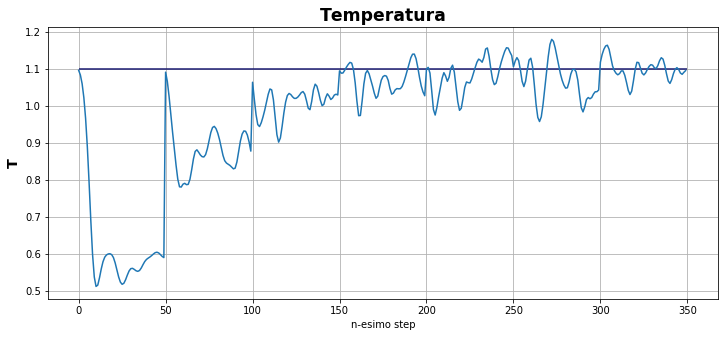

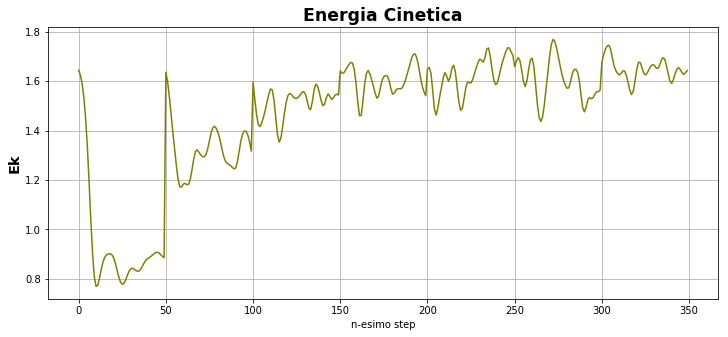

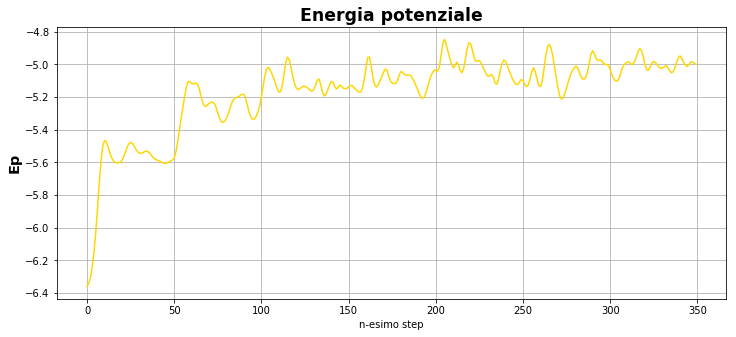

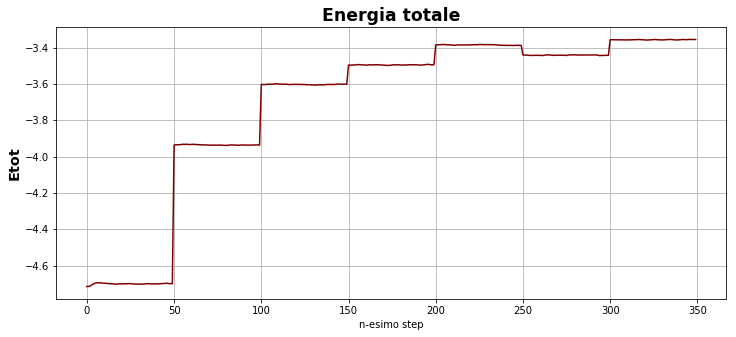

In [2]:
T=np.loadtxt("MolecularDynamics_NVE/output_temp.dat")
E_p=np.loadtxt("MolecularDynamics_NVE/output_epot.dat")
E_k=np.loadtxt("MolecularDynamics_NVE/output_ekin.dat")
E_tot=np.loadtxt("MolecularDynamics_NVE/output_etot.dat")

fig=plt.figure(figsize=(12, 5))
plt.plot(T)
plt.xlabel('n-esimo step')
plt.ylabel('T',size='x-large', weight='bold')
plt.title('Temperatura',size='xx-large', weight='bold')
plt.hlines(1.1, 0, T.size, color='midnightblue')
plt.grid(True)
#plt.xlim(99,101)
plt.show()

fig=plt.figure(figsize=(12, 5))
plt.plot(E_k, color = 'olive')
plt.xlabel('n-esimo step')
plt.ylabel('Ek',size='x-large', weight='bold')
plt.title('Energia Cinetica',size='xx-large', weight='bold')

plt.grid(True)
plt.show()

fig=plt.figure(figsize=(12, 5))
plt.plot(E_p, color='gold')
plt.xlabel('n-esimo step')
plt.ylabel('Ep',size='x-large', weight='bold')
plt.title('Energia potenziale',size='xx-large', weight='bold')

plt.grid(True)
plt.show()

fig=plt.figure(figsize=(12, 5))
plt.plot(E_tot, color='maroon')
plt.xlabel('n-esimo step')
plt.ylabel('Etot',size='x-large', weight='bold')
plt.title('Energia totale',size='xx-large', weight='bold')

plt.grid(True)

plt.show()

Come si può notare dai grafici all'incirca dopo cinque iterazioni dell'algoritmo possiamo considerare la configurazione di partenza come equilibrata. La temperatura è riportata al suo valore di target ogni qual volta si fa partire una simulazione e dopo quattro o cinque iterazioni oscillerà attorno a questo valore senza più allontanarvisi. L'energia cinetica presenta un comportamento che è ovviamente analogo, mentre per quanto riguarda l'energia totale, finita l'equilibrazione, il suo valore appare costante, come ci si aspetta che sia.

# Esercizio 4.2

In questo esercizio è richiesto che oltre alla misura delle grandezze sopra riportate si implementi nel codice anche la misura del valor medio di ognuna di esse.
Ciò è stato fatto assieme al metodo del data blocking per stimare le incertezze su queste quantità.



Carichiamo i dati da file avendo precedentemente equilibrato l'algoritmo, graficando in questo caso il valore medio delle grandezze considerate. Il file di input è per ora mantenuto invariato rispetto all'esercizio 4.1.

$\textbf{oss}$: per il metodo del data blocking utilizzeremo un numero di blocchi $N_{b}=100$.

In [3]:
T=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_temp.out")
T_err=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_err_temp.out")

E_tot=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_etot.out")
E_tot_err=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_err_etot.out")

E_k=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_ekin.out")
E_k_err=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_err_ekin.out")

E_p=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_epot.out")
E_p_err=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_err_epot.out")

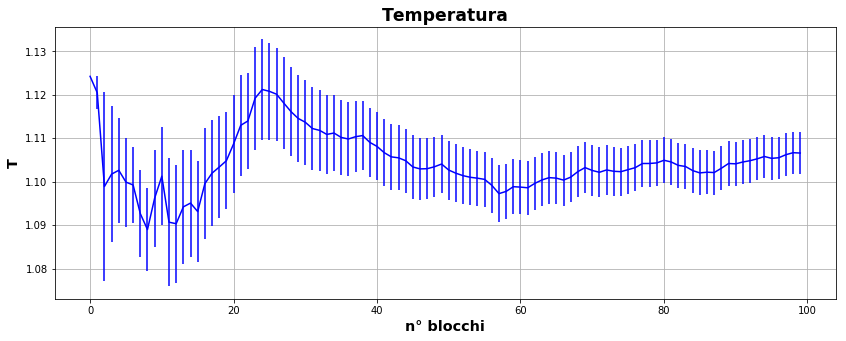

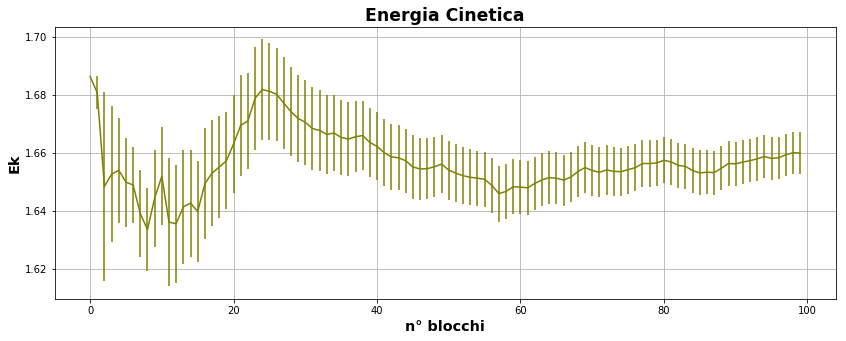

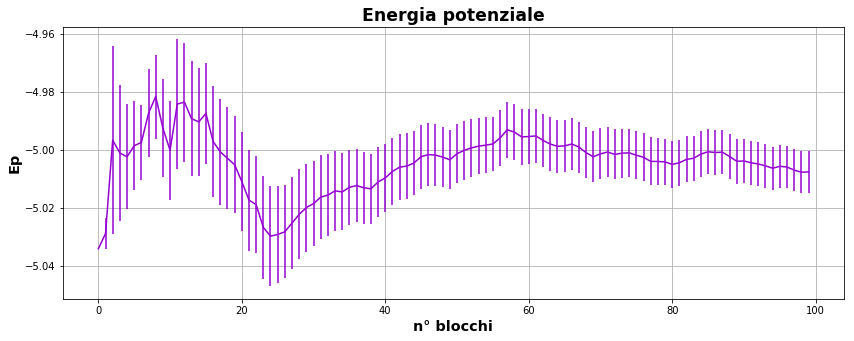

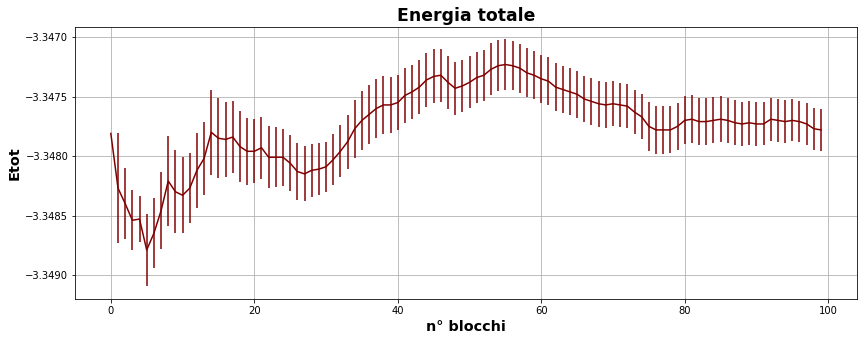

In [4]:
fig=plt.figure(figsize=(14, 5))
plt.errorbar(x=range(0,T.size),y=T,yerr=T_err, color='blue')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('T',size='x-large', weight='bold')
plt.title('Temperatura',size='xx-large', weight='bold')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 5))
plt.errorbar(x=range(0,T.size),y=E_k,yerr=E_k_err, color='olive')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Ek',size='x-large', weight='bold')
plt.title('Energia Cinetica',size='xx-large', weight='bold')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 5))
plt.errorbar(x=range(0,T.size),y=E_p,yerr=E_p_err, color='darkviolet')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Ep',size='x-large', weight='bold')
plt.title('Energia potenziale',size='xx-large', weight='bold')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 5))
plt.errorbar(x=range(0,T.size),y=E_tot,yerr=E_tot_err, color='maroon')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Etot',size='x-large', weight='bold')
plt.title('Energia totale',size='xx-large', weight='bold')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

In [5]:
e=120*1.380649E-23
e_kb=120;

# Esercizio 4.3

In questo esercizio ci proponiamo di studiare un sistema di Argon nelle seguenti fasi:
1. solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0)$

dove l'asterisco indica le unità di lennard-Jones. In questo caso l'equilibrazione del sistema può essere fatta tramite gli appositi comandi scritti nel makefile.
Carichiamo i dati dai file nelle cartelle apposite, per ognuno di essi è stato eseguita l'equilibrazione del sistema. 

Il file di input prevede la possibilità di scegliere di salvare i file nella cartella dell'Argon nella prima entrata.

$\textbf{oss}$: è richiesto che si usino le unità del sistema internazione (SI) nei grafici. La conversione è presto realizzata tramite i fattori:

In [6]:
e=120*1.380649E-23
e_kb=120;

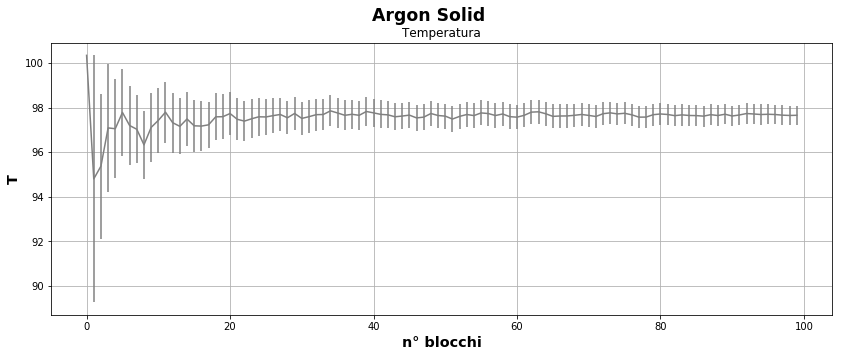

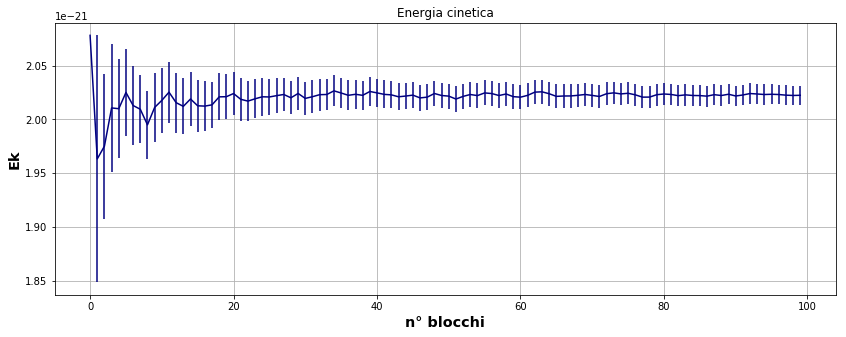

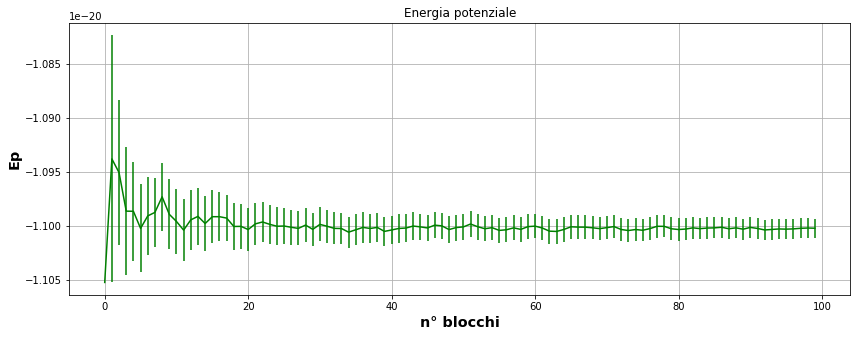

In [7]:
fig=plt.figure(figsize=(14, 5))
plt.suptitle("Argon Solid", size='xx-large', weight='bold')
T=np.loadtxt("MolecularDynamics_NVE/Argon/Solid/ave_temp.out", max_rows=100)*e_kb
T_err=np.loadtxt("MolecularDynamics_NVE/Argon/Solid/ave_err_temp.out")*e_kb
plt.errorbar(x=range(0,T.size),y=T,yerr=T_err, color='grey')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('T',size='x-large', weight='bold')
plt.title('Temperatura')
#plt.hlines(0.8, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 5))
E_k=np.loadtxt("MolecularDynamics_NVE/Argon/Solid/ave_ekin.out")*e
E_k_err=np.loadtxt("MolecularDynamics_NVE/Argon/Solid/ave_err_ekin.out")*e
plt.errorbar(x=range(0,T.size),y=E_k,yerr=E_k_err, color='navy')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Ek',size='x-large', weight='bold')
plt.title('Energia cinetica')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 5))
E_p=np.loadtxt("MolecularDynamics_NVE/Argon/Solid/ave_epot.out")*e
E_p_err=np.loadtxt("MolecularDynamics_NVE/Argon/Solid/ave_err_epot.out")*e
plt.errorbar(x=range(0,T.size),y=E_p,yerr=E_p_err, color='green')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Ep',size='x-large', weight='bold')
plt.title('Energia potenziale')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()




Come lecito aspettarsi, il sistema appare piuttosto stabile.

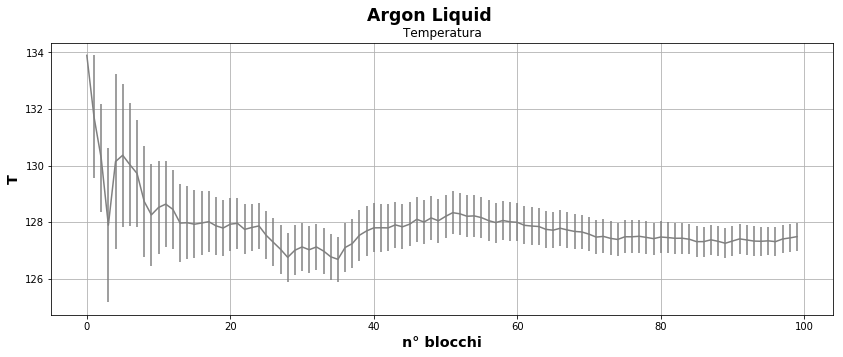

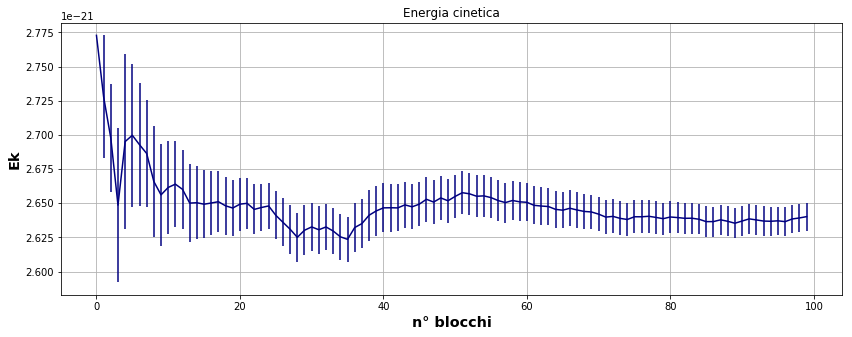

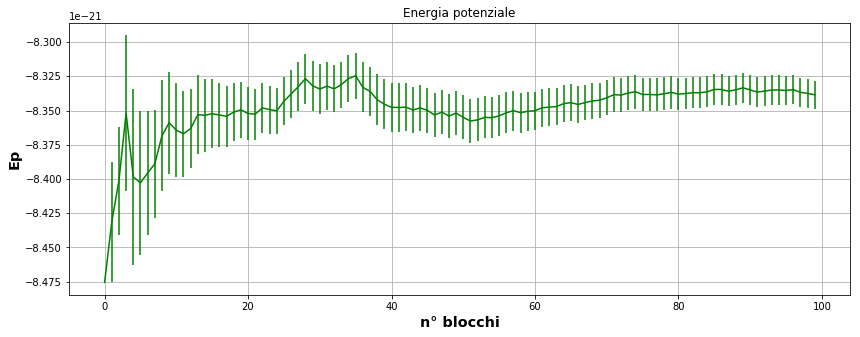

In [8]:
fig=plt.figure(figsize=(14, 5))
plt.suptitle("Argon Liquid", size='xx-large', weight='bold')
T=np.loadtxt("MolecularDynamics_NVE/Argon/Liquid/ave_temp.out")*e_kb
T_err=np.loadtxt("MolecularDynamics_NVE/Argon/Liquid/ave_err_temp.out")*e_kb
plt.errorbar(x=range(0,T.size),y=T,yerr=T_err, color='grey')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('T',size='x-large', weight='bold')
plt.title('Temperatura')
#plt.hlines(0.8, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 5))
E_k=np.loadtxt("MolecularDynamics_NVE/Argon/Liquid/ave_ekin.out")*e
E_k_err=np.loadtxt("MolecularDynamics_NVE/Argon/Liquid/ave_err_ekin.out")*e
plt.errorbar(x=range(0,T.size),y=E_k,yerr=E_k_err, color='navy')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Ek',size='x-large', weight='bold')
plt.title('Energia cinetica')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 5))
E_p=np.loadtxt("MolecularDynamics_NVE/Argon/Liquid/ave_epot.out")*e
E_p_err=np.loadtxt("MolecularDynamics_NVE/Argon/Liquid/ave_err_epot.out")*e
plt.errorbar(x=range(0,T.size),y=E_p,yerr=E_p_err, color='green')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Ep',size='x-large', weight='bold')
plt.title('Energia potenziale')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()



Il sistema appare sicuramente meno stabile di quello solido, ma nel complesso non vi sono grandi variazioni.

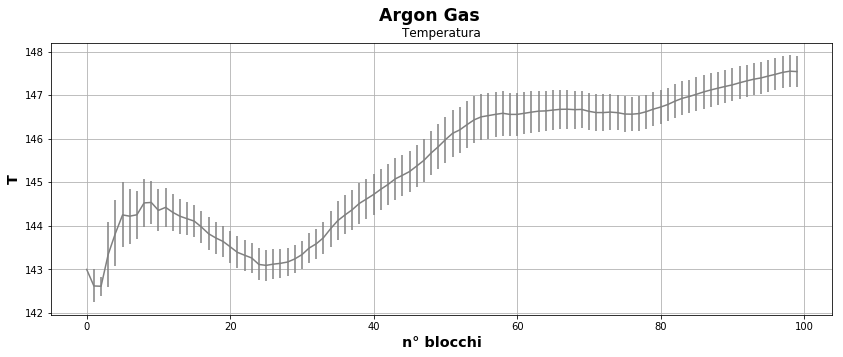

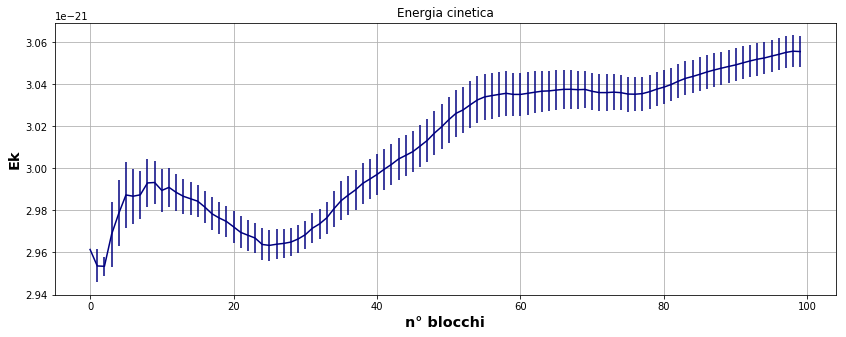

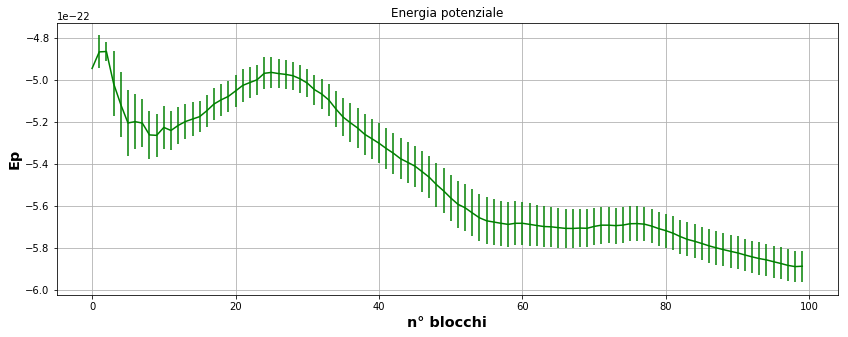

In [9]:
fig=plt.figure(figsize=(14, 5))
plt.suptitle("Argon Gas", size='xx-large', weight='bold')
T=np.loadtxt("MolecularDynamics_NVE/Argon/Gas/ave_temp.out")*e_kb
T_err=np.loadtxt("MolecularDynamics_NVE/Argon/Gas/ave_err_temp.out")*e_kb
plt.errorbar(x=range(0,T.size),y=T,yerr=T_err, color='grey')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('T',size='x-large', weight='bold')
plt.title('Temperatura')
#plt.hlines(0.8, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 5))
E_k=np.loadtxt("MolecularDynamics_NVE/Argon/Gas/ave_ekin.out")*e
E_k_err=np.loadtxt("MolecularDynamics_NVE/Argon/Gas/ave_err_ekin.out")*e
plt.errorbar(x=range(0,T.size),y=E_k,yerr=E_k_err, color='navy')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Ek',size='x-large', weight='bold')
plt.title('Energia cinetica')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(14, 5))
E_p=np.loadtxt("MolecularDynamics_NVE/Argon/Gas/ave_epot.out")*e
E_p_err=np.loadtxt("MolecularDynamics_NVE/Argon/Gas/ave_err_epot.out")*e
plt.errorbar(x=range(0,T.size),y=E_p,yerr=E_p_err, color='green')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Ep',size='x-large', weight='bold')
plt.title('Energia potenziale')
#plt.hlines(1.1, 0, 800, color='midnightblue')
plt.grid(True)
plt.show()




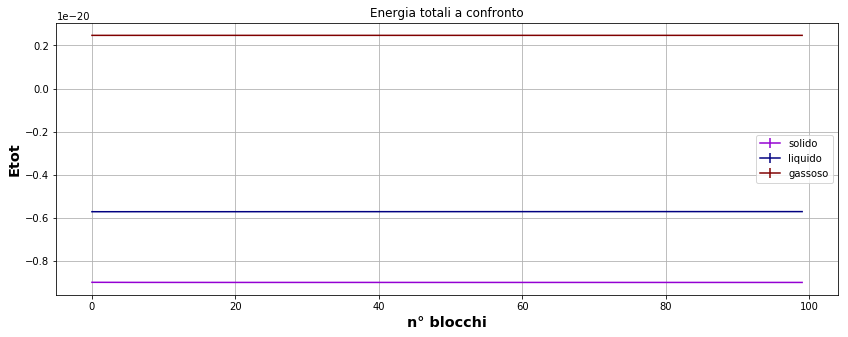

In [10]:
fig=plt.figure(figsize=(14, 5))
E_tot=np.loadtxt("MolecularDynamics_NVE/Argon/Solid/ave_etot.out")*e
E_tot_err=np.loadtxt("MolecularDynamics_NVE/Argon/Solid/ave_err_etot.out")*e
plt.errorbar(x=range(0,T.size),y=E_tot,yerr=E_tot_err, color='darkviolet',label="solido")
plt.title('Energia totali a confronto')

E_tot=np.loadtxt("MolecularDynamics_NVE/Argon/Liquid/ave_etot.out")*e
E_tot_err=np.loadtxt("MolecularDynamics_NVE/Argon/Liquid/ave_err_etot.out")*e
plt.errorbar(x=range(0,T.size),y=E_tot,yerr=E_tot_err, color='navy',label="liquido")

E_tot=np.loadtxt("MolecularDynamics_NVE/Argon/Gas/ave_etot.out")*e
E_tot_err=np.loadtxt("MolecularDynamics_NVE/Argon/Gas/ave_err_etot.out")*e
plt.errorbar(x=range(0,T.size),y=E_tot,yerr=E_tot_err, color='maroon',label="gassoso")

plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('Etot',size='x-large', weight='bold')
plt.legend()
plt.grid(True)
plt.show()

Un sistema gassoso, come è possibile notare da questi grafici, presenta variazioni decisamente maggiori delle grandezze considerate, con l'eccezione dell'energia totale, che rimane costante per tutti e tre i sistemi.

# Esercizio 4.4 

Per ultima cosa si richiede di aggiungere al codice la misura della pressione, calcolata tramite il teorema del viriale, con la seguente formula:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

eseguiamo il compito per un sistema già equilibrato, come fatto nell'esercizio 4.2.



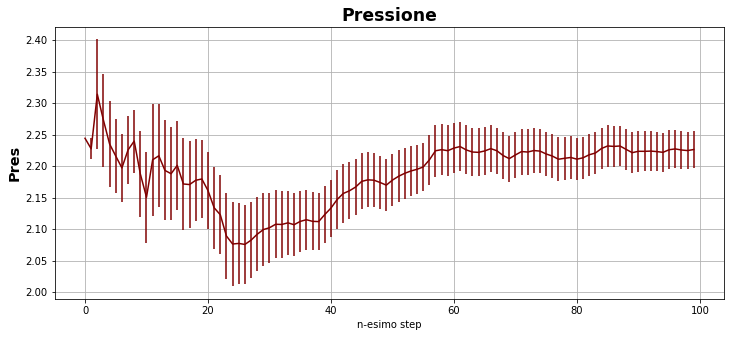

In [11]:
pres=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_pres.out")
pres_err=np.loadtxt("MolecularDynamics_NVE/equilibrate/ave_err_pres.out")
fig=plt.figure(figsize=(12, 5))
plt.errorbar(x=range(0,pres.size),y=pres,yerr=pres_err, color='maroon')
plt.xlabel('n-esimo step')
plt.ylabel('Pres',size='x-large', weight='bold')
plt.title('Pressione',size='xx-large', weight='bold')
plt.grid(True)
#plt.xlim(400,700)
plt.show()
